![header](../figures/logos_partenaires._cmems_se.jpg)


<div class="alert alert-block alert-success">
<h1><center> Read and plot Gulf Stream SWOT data at one specific date </center></h1>
<h2><center>For 1 day orbit data </center></h2></div>

***
**Authors:**  Datlas, IGE, IMEDEA & CLS <br>
**Copyright:** 2022 Datlas, IGE, IMEDEA & CLS <br>
**License:** MIT

In [6]:
import os
import glob
import sys
sys.path.append('..')
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from src import mod_plot
from src import mod_switchvar
from src.dict_regions_info import *

In [7]:

region_info = RegionInfo('GS_info').region_info   # Region dictionary info from dict_regions_info.py


## Read from regional data files 

In [15]:
path_data = '../swot_versions/SWOT_v1.0/SWOT_'+region_info['name']+'_v1.0.nc'

date_plot = np.datetime64('2023-04-25')

label_noisy_v1 = 'Noisy_v1'   # Name for plots title and saving figures
label_denoised_v1 = 'Denoised_v1'   # Name for plots title and saving figures


name_noisy_v1 = 'ssha' # Name of the denoised SWOT variable in the xarray file 
name_denoised_v1 = 'ssha_noiseless' # Name of the denoised SWOT variable in the xarray file

orbit = '1d'

ds_passes_v1 = xr.open_mfdataset(path_data,combine='nested',concat_dim='num_lines') 

In [17]:
path_data = '../swot_versions/SWOT_v2.0/SWOT_'+region_info['name']+'_v2.0.nc'

date_plot = np.datetime64('2023-04-25')

label_noisy_v2 = 'Noisy_v2'   # Name for plots title and saving figures
label_denoised_v2 = 'Denoised_v2'   # Name for plots title and saving figures


name_noisy_v2 = 'ssha_unfiltered' # Name of the denoised SWOT variable in the xarray file 
name_denoised_v2 = 'ssha_filtered' # Name of the denoised SWOT variable in the xarray file

orbit = '1d'

ds_passes_v2 = xr.open_mfdataset(path_data,combine='nested',concat_dim='num_lines') 

In [4]:
ds_SWOT = xr.open_mfdataset(path_data) 

## Plot noisy and baseline denoised SSH

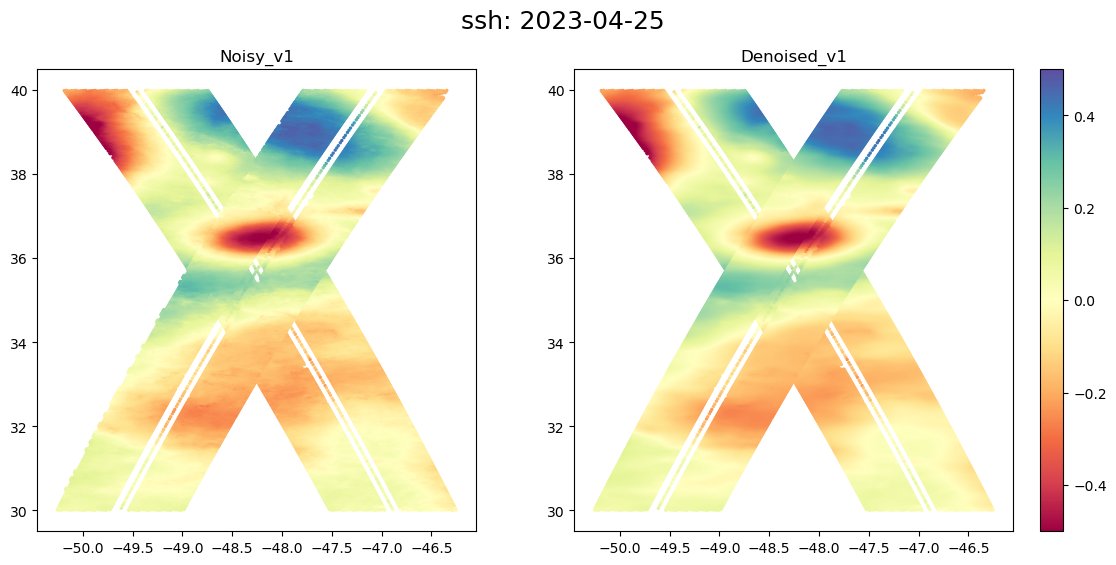

In [18]:
 
mod_plot.plot_compare_snapshots(ds_passes_v1, methods=[label_noisy_v1,label_denoised_v1], var_type='ssh', name_var=[name_noisy_v1, name_denoised_v1], date_plot=date_plot, vmax=0.5, region_info=region_info, method=label_noisy_v1, orbit = orbit, colsize = 14)


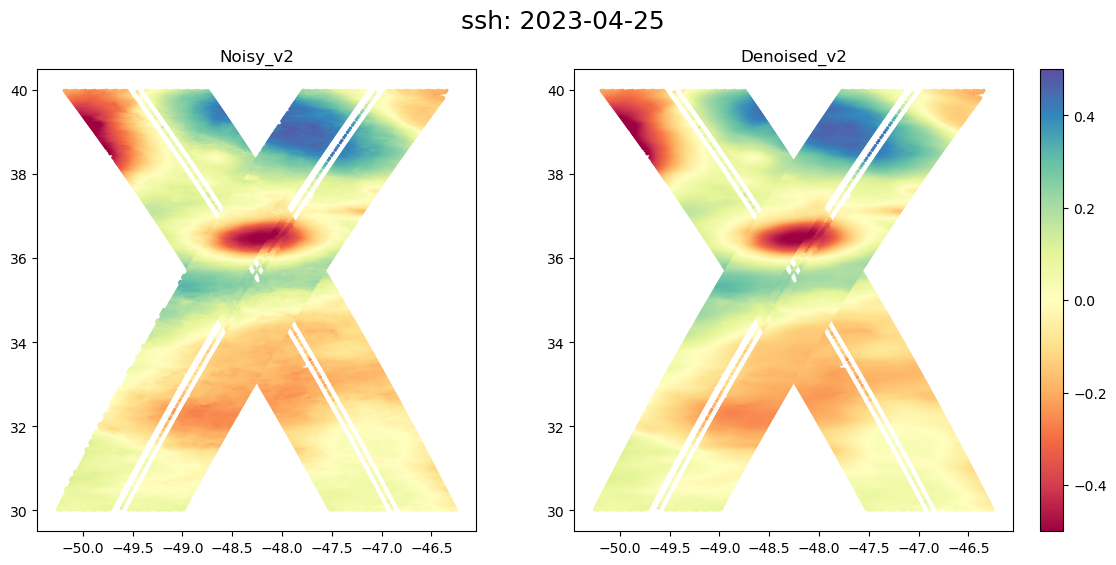

In [19]:
 
mod_plot.plot_compare_snapshots(ds_passes_v2, methods=[label_noisy_v2,label_denoised_v2], var_type='ssh', name_var=[name_noisy_v2, name_denoised_v2], date_plot=date_plot, vmax=0.5, region_info=region_info, method=label_noisy_v1, orbit = orbit, colsize = 14)


## Compute and plot SSH gradients and Laplacian

In [23]:
grad_noisy, lapl_noisy = mod_switchvar.deriv1and2(ds_passes_v1[name_noisy_v1])
grad_denoised, lapl_denoised = mod_switchvar.deriv1and2(ds_passes_v1[name_denoised_v1]) 

ds_passes_v1 = ds_passes_v1.assign(grad_noisy=lambda ds_passes_v1: ds_passes_v1[name_noisy_v1] * 0 + grad_noisy)
ds_passes_v1 = ds_passes_v1.assign(grad_denoised=lambda ds_passes_v1: ds_passes_v1[name_denoised_v1] * 0 + grad_denoised) 


ds_passes_v1 = ds_passes_v1.assign(lapl_noisy=lambda ds_passes_v1: ds_passes_v1[name_noisy_v1] * 0 + lapl_noisy)
ds_passes_v1 = ds_passes_v1.assign(lapl_denoised=lambda ds_passes_v1: ds_passes_v1[name_denoised_v1] * 0 + lapl_denoised) 


In [24]:
grad_noisy, lapl_noisy = mod_switchvar.deriv1and2(ds_passes_v2[name_noisy_v2])
grad_denoised, lapl_denoised = mod_switchvar.deriv1and2(ds_passes_v2[name_denoised_v2]) 

ds_passes_v2 = ds_passes_v2.assign(grad_noisy=lambda ds_passes_v2: ds_passes_v2[name_noisy_v2] * 0 + grad_noisy)
ds_passes_v2 = ds_passes_v2.assign(grad_denoised=lambda ds_passes_v2: ds_passes_v2[name_denoised_v2] * 0 + grad_denoised) 


ds_passes_v2 = ds_passes_v2.assign(lapl_noisy=lambda ds_passes_v2: ds_passes_v2[name_noisy_v2] * 0 + lapl_noisy)
ds_passes_v2 = ds_passes_v2.assign(lapl_denoised=lambda ds_passes_v2: ds_passes_v2[name_denoised_v2] * 0 + lapl_denoised) 


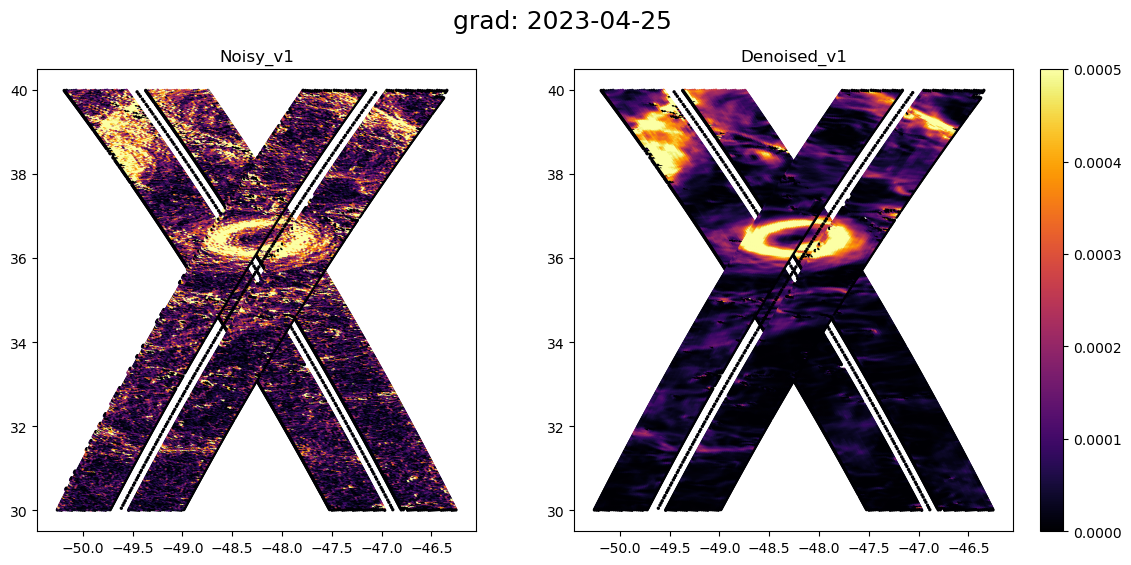

In [25]:
  
mod_plot.plot_compare_snapshots(ds_passes_v1, methods=[label_noisy_v1, label_denoised_v1], var_type='grad', name_var=['grad_noisy','grad_denoised'], date_plot=date_plot, region_info=region_info, method=label_noisy_v1, orbit = orbit, colsize = 14)
 

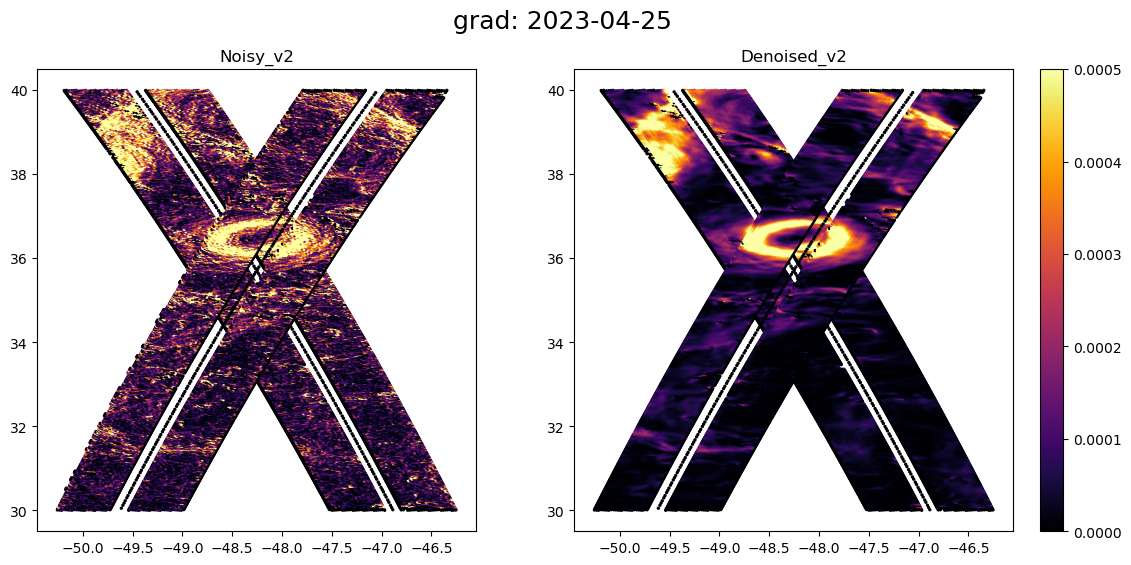

In [26]:
  
mod_plot.plot_compare_snapshots(ds_passes_v2, methods=[label_noisy_v2, label_denoised_v2], var_type='grad', name_var=['grad_noisy','grad_denoised'], date_plot=date_plot, region_info=region_info, method=label_noisy_v1, orbit = orbit, colsize = 14)
 

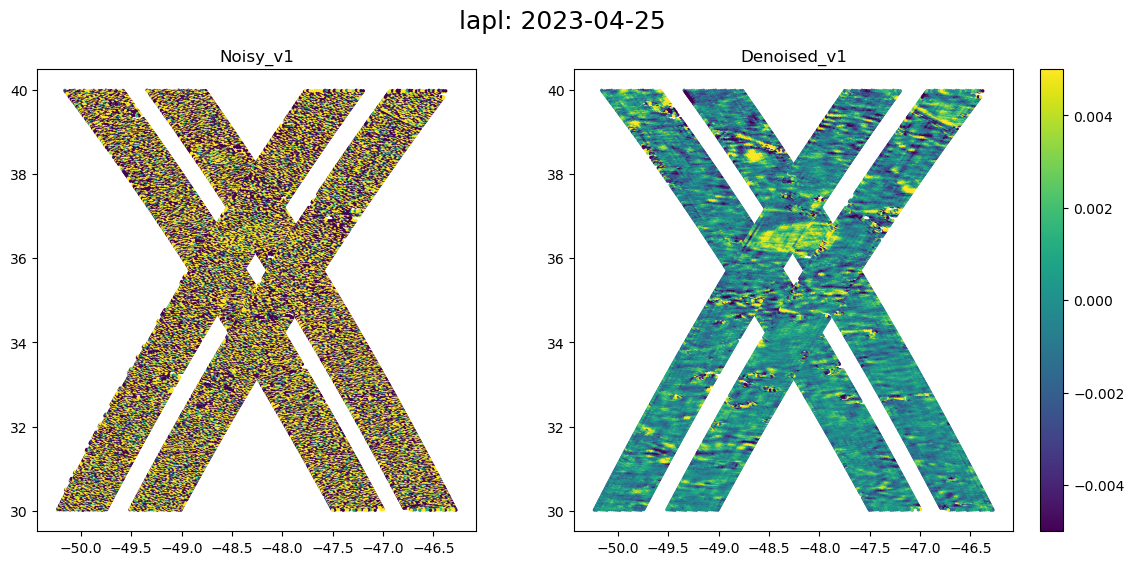

In [27]:
  
mod_plot.plot_compare_snapshots(ds_passes_v1, methods=[label_noisy_v1, label_denoised_v1], var_type='lapl', name_var=['lapl_noisy','lapl_denoised'], date_plot=date_plot, region_info=region_info, method=label_noisy_v1, orbit = orbit, colsize = 14)
 

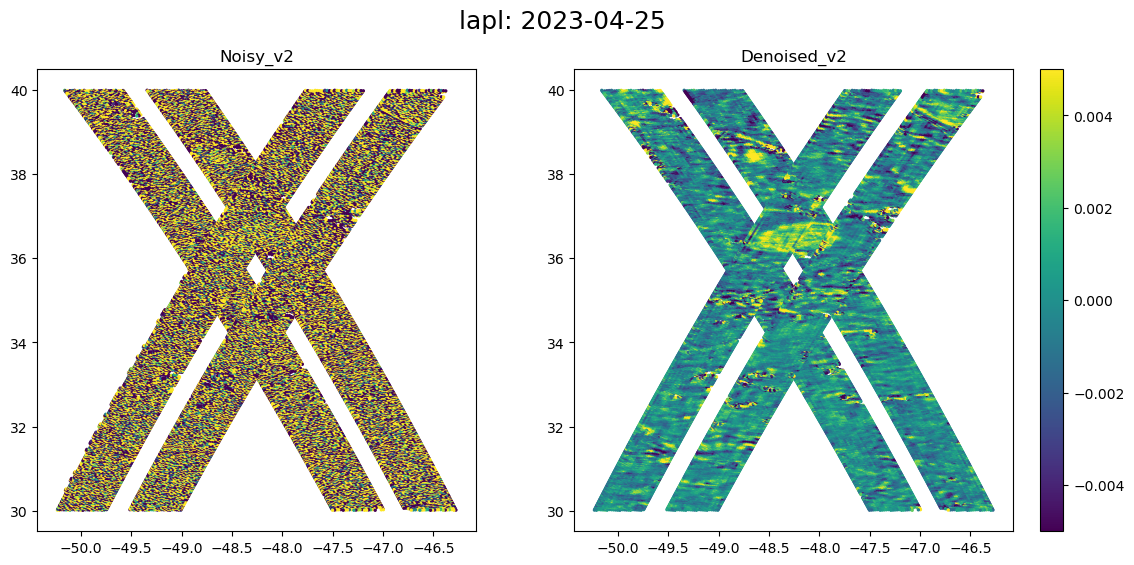

In [28]:
  
mod_plot.plot_compare_snapshots(ds_passes_v2, methods=[label_noisy_v2, label_denoised_v2], var_type='lapl', name_var=['lapl_noisy','lapl_denoised'], date_plot=date_plot, region_info=region_info, method=label_noisy_v2, orbit = orbit, colsize = 14)
 